In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

### Data Collection

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/housing.csv')

### Data Exploration

In [3]:
df.head()

,id,price,area,bedrooms,bathrooms,stories,stories.1,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


In [4]:
df.columns

Index(['id', 'price', 'area', 'bedrooms', 'bathrooms', 'stories', 'stories.1',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'stories.1'}>,
        <Axes: title={'center': 'guestroom'}>],
       [<Axes: title={'center': 'basement'}>,
        <Axes: title={'center': 'hotwaterheating'}>,
        <Axes: title={'center': 'airconditioning'}>,
        <Axes: title={'center': 'parking'}>],
       [<Axes: title={'center': 'prefarea'}>,
        <Axes: title={'center': 'furnishingstatus'}>, <Axes: >, <Axes: >]],
      dtype=object)

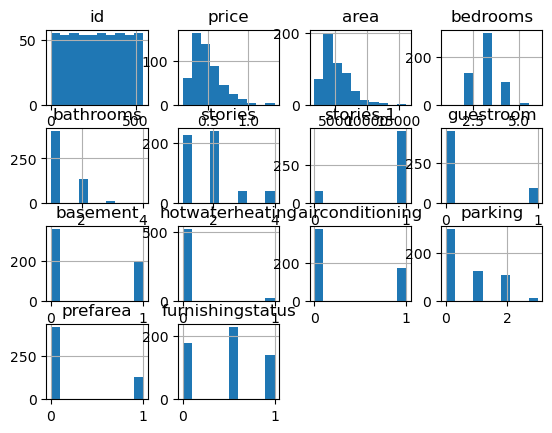

In [5]:
df.hist()

In [6]:
df.dtypes

id                    int64
price                 int64
area                  int64
bedrooms              int64
bathrooms             int64
stories               int64
stories.1             int64
guestroom             int64
basement              int64
hotwaterheating       int64
airconditioning       int64
parking               int64
prefarea              int64
furnishingstatus    float64
dtype: object

<Axes: xlabel='stories'>

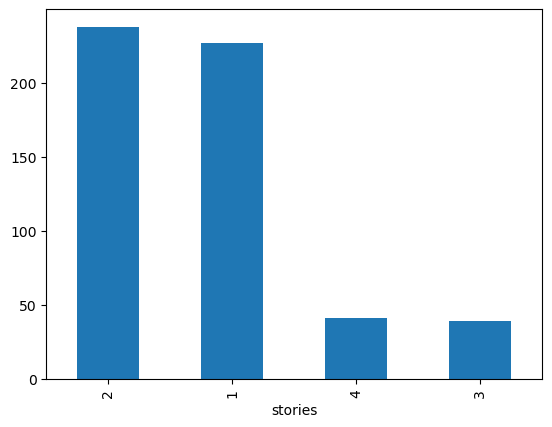

In [7]:
df['stories'].value_counts().plot(kind='bar')

In [8]:
df['stories'].unique

<bound method Series.unique of 0      3
1      4
2      2
3      2
4      2
      ..
540    1
541    1
542    1
543    1
544    2
Name: stories, Length: 545, dtype: int64>

<Axes: xlabel='stories.1'>

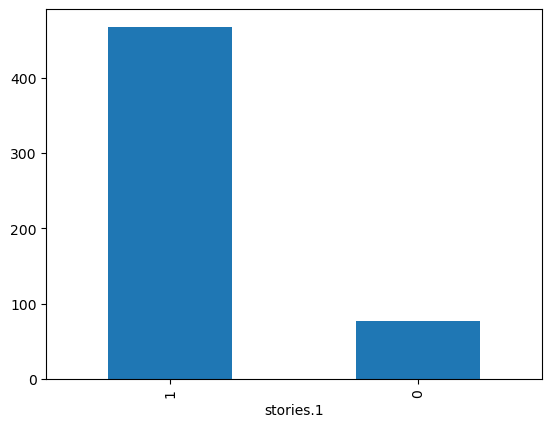

In [9]:
df['stories.1'].value_counts().plot(kind='bar')

<Axes: xlabel='guestroom'>

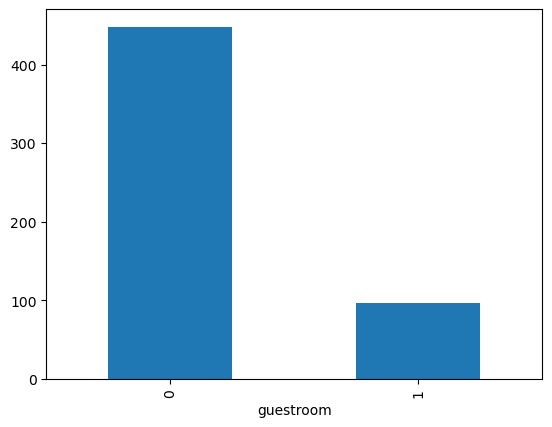

In [10]:
df['guestroom'].value_counts().plot(kind='bar')

<Axes: xlabel='basement'>

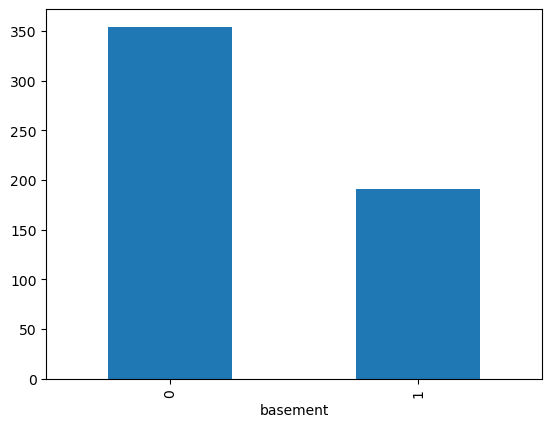

In [11]:
df['basement'].value_counts().plot(kind='bar')

<Axes: xlabel='hotwaterheating'>

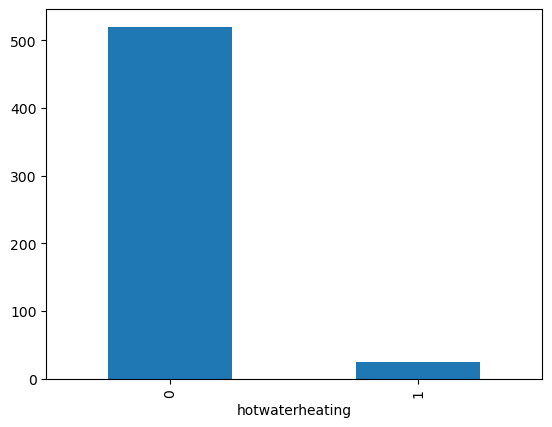

In [12]:
df['hotwaterheating'].value_counts().plot(kind='bar')

<Axes: xlabel='airconditioning'>

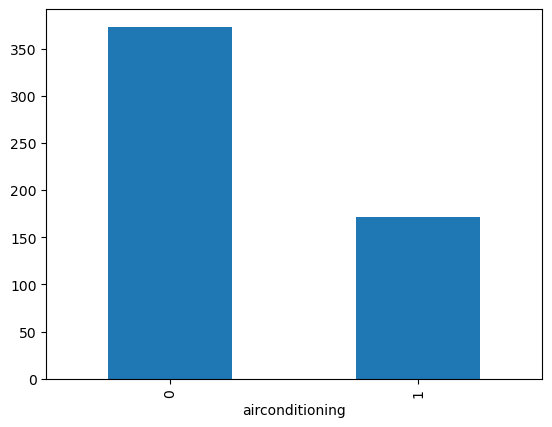

In [13]:
df['airconditioning'].value_counts().plot(kind='bar')

<Axes: xlabel='parking'>

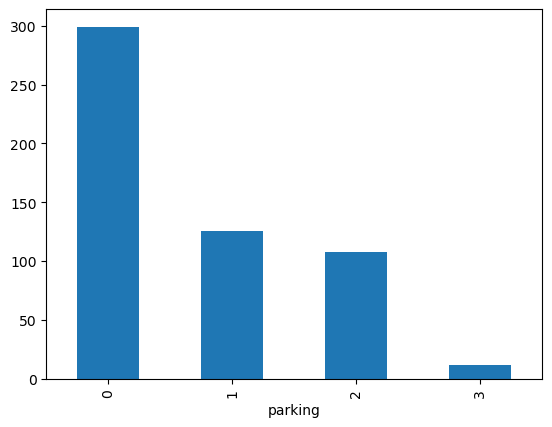

In [14]:
df['parking'].value_counts().plot(kind='bar')

<Axes: xlabel='prefarea'>

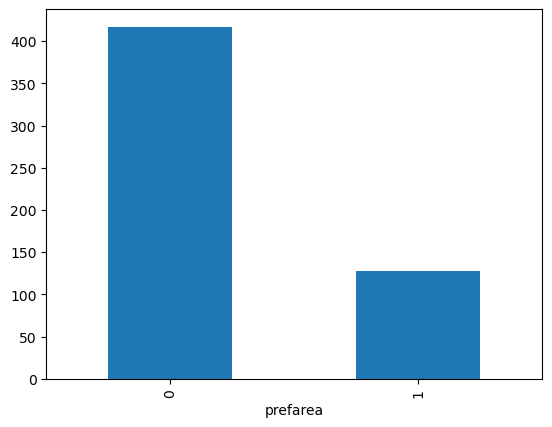

In [15]:
df['prefarea'].value_counts().plot(kind='bar')

<Axes: xlabel='furnishingstatus'>

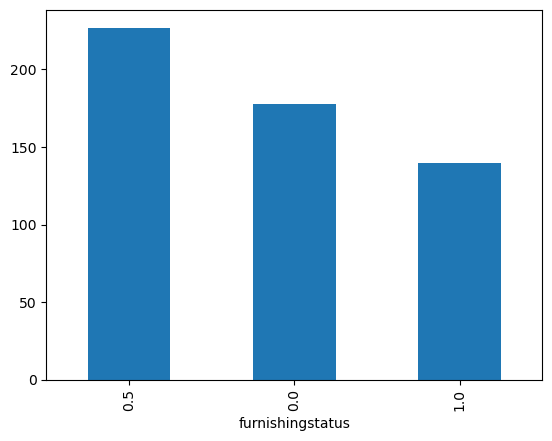

In [16]:
df['furnishingstatus'].value_counts().plot(kind='bar')

### Data Preprocessing

#### For training the model, i have dropped the stories.1 and id column

In [23]:
# df = df.drop('stories.1', axis = 1) #dropping stories.1
# df = df.drop('id', axis = 1) #dropping id

In [24]:
df.dtypes

price                 int64
area                  int64
bedrooms              int64
bathrooms             int64
stories               int64
stories.1             int64
guestroom             int64
basement              int64
hotwaterheating       int64
airconditioning       int64
parking               int64
prefarea              int64
furnishingstatus    float64
dtype: object

In [27]:
X = df.drop('price', axis =1)
y = df['price']

### Training and Splitting data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [29]:
X_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'stories.1', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

### Model Training

In [47]:
model = LinearRegression()
model.fit(X_train, y_train) #fit the data on train variables

LinearRegression()

### Model Evaluation

In [31]:
reg = LinearRegression().fit(X_train, y_train) #make sure you use the correct parameters inside the paranthesis
reg.score(X_train, y_train)

0.680069137617004

In [32]:
print(model.intercept_)

-290666.2541153813


In [33]:
model.coef_

array([2.52437777e+02, 9.42812223e+04, 9.49289821e+05, 4.68885198e+05,
       3.83904659e+05, 1.65883277e+05, 4.49353826e+05, 1.04798265e+06,
       8.22624793e+05, 2.78133328e+05, 6.28150919e+05, 4.69819174e+05])

In [34]:
cdf=pd.DataFrame(model.coef_,X.columns,columns=['Coeff'])

In [35]:
cdf

,Coeff
area,2.524378e+02
bedrooms,9.428122e+04
bathrooms,9.492898e+05
stories,4.688852e+05
stories.1,3.839047e+05
guestroom,1.658833e+05
basement,4.493538e+05
hotwaterheating,1.047983e+06
airconditioning,8.226248e+05
parking,2.781333e+05


### Making Predictions

In [36]:
predictions = model.predict(X_test) # make sure you put the right variable in the predict parameter
predictions

array([5217609.51491749, 6388239.78376636, 5025401.70513489,
       4902954.57951595, 4593223.82911336, 3545580.92621687,
       7094778.0981089 , 3328881.48114348, 5072981.79872227,
       5527734.45410741, 4807407.30296509, 7494268.14788747,
       4409086.29543661, 4376312.71640489, 6309765.77612321,
       5617343.00426684, 5326258.52341898, 6722363.54772976,
       2618849.37624396, 3384108.47301845, 5057875.68413119,
       4749770.52945254, 6007204.75167213, 5784856.32907668,
       3545898.57091456, 4018179.06629561, 2691726.58711945,
       4280569.66294747, 3366253.17404104, 4878527.07060129,
       6545311.50316192, 3114736.84211614, 6737337.89694784,
       2745113.7886037 , 6123466.50121115, 2899055.30840474,
       4601149.06198973, 7403094.76209636, 3713806.79296881,
       2608751.8651751 , 4373697.1859809 , 6694459.54117247,
       5063580.86128457, 5709313.59158867, 3091502.24712205,
       2766142.53163464, 5656871.44913238, 3970667.66242493,
       6798182.34683794,

In [37]:
y_test

225    4753000
18     8890000
48     7455000
355    3773000
350    3780000
        ...   
543    1750000
256    4480000
111    6090000
205    4900000
516    2450000
Name: price, Length: 137, dtype: int64

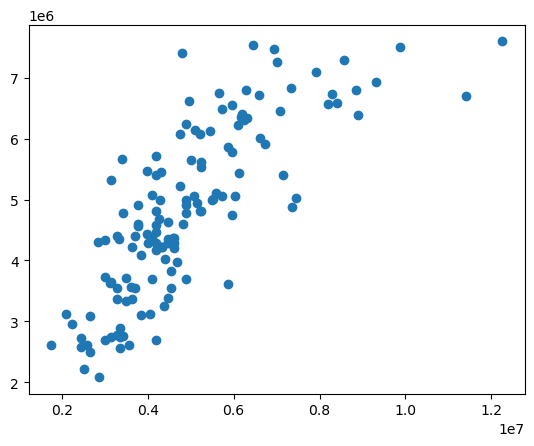

In [38]:
plt.scatter(y_test, predictions)

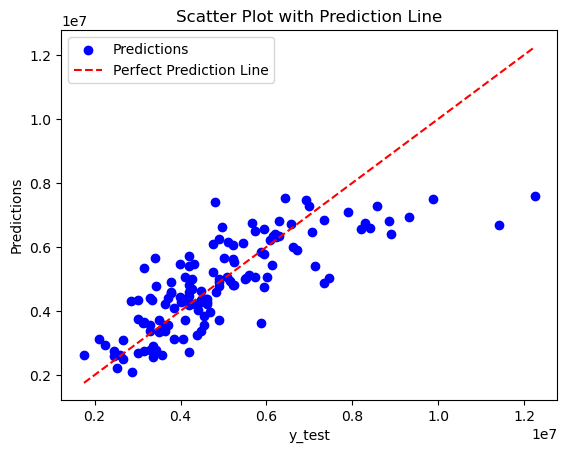

In [46]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(y_test, predictions, label='Predictions', color='blue')

# Line for predictions (y_test == predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')

# Labels and title
plt.xlabel('y_test')
plt.ylabel('Predictions')
plt.title('Scatter Plot with Prediction Line')

# Show legend
plt.legend()

# Show the plot
plt.show()


C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


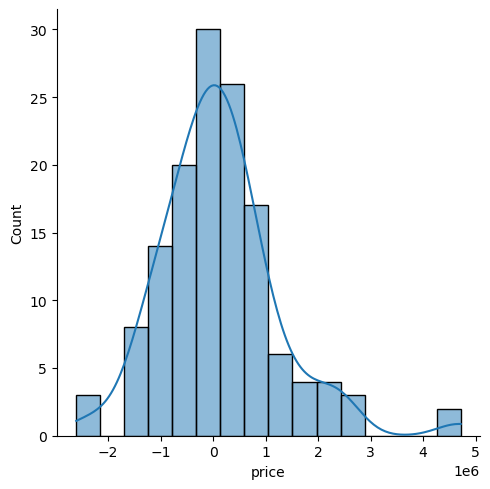

In [39]:
sns.displot(y_test-predictions, kde=True)

In [40]:
from sklearn import metrics

In [41]:
#square root mean squared error
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1121132.550027022